In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## MAR: Comparing with paper experiment

In [ ]:
import pandas as pd
import json
import seaborn as sns

df = pd.DataFrame([], columns=('Simulator', 'RMSE'))

with open('./paper_original_experiment/MAR.json') as f:
        paper = json.load(f)
df = df.concat({})

## MAR: Gradually increasing Z->R edges density

<AxesSubplot:xlabel='density', ylabel='RMSE'>

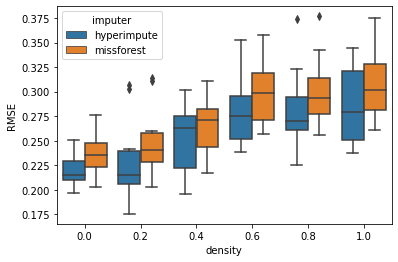

In [12]:
import pandas as pd
import json
import seaborn as sns

df = pd.DataFrame([], columns=('RMSE', 'imputer', 'density'))
for name, density in zip(
        ['MAR_ZR_{}.json'.format(d) for d in ['00', '02', '04', '06', '08', '10']],
        [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]):
    with open(name) as f:
        report = json.load(f)
    hp = pd.DataFrame({'imputer': ['hyperimpute']*10, 'density': [str(density)]*10, 'RMSE': report['hyperimpute']})
    mf = pd.DataFrame({'imputer': ['missforest']*10, 'density': [str(density)]*10, 'RMSE': report['missforest']})
    df = pd.concat([df, hp, mf], ignore_index=True)

sns.boxplot(df, x='density', y='RMSE', hue='imputer')